In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb

### Reading and Pre-processing

In [102]:
df = pd.read_csv("./USA_Hourly_PC.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index )

In [103]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [104]:
df.tail()

,AEP_MW
Datetime,
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0
2018-01-01 23:00:00,20415.0
2018-01-02 00:00:00,19993.0


<AxesSubplot:title={'center':'Hourly Power Consumption in USA'}, xlabel='Datetime'>

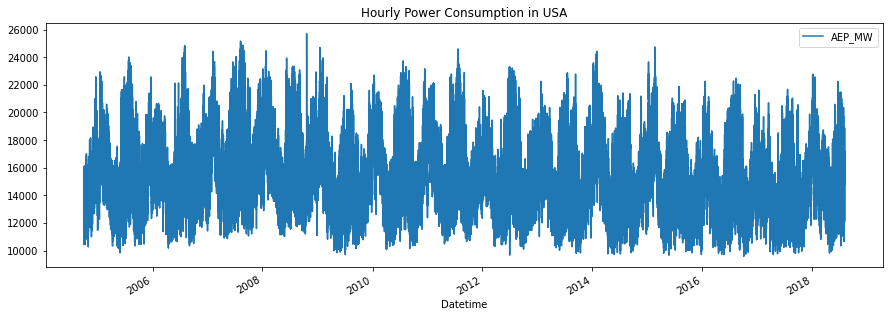

In [105]:
df.plot(figsize=(15,5),title="Hourly Power Consumption in USA")

### Train-Test split

<AxesSubplot:xlabel='Datetime'>

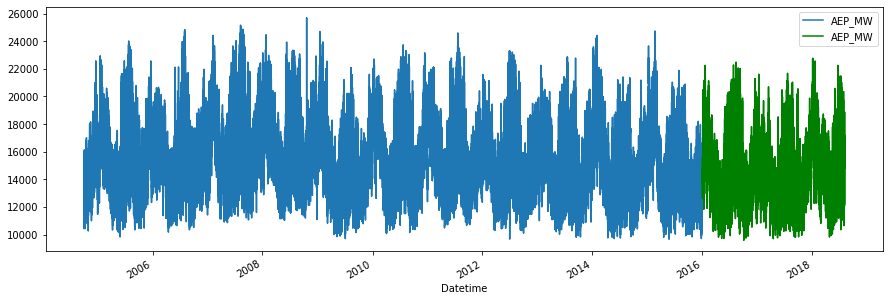

In [106]:
x_train = df.loc[df.index<'01-01-2016']
x_test = df.loc[df.index>='01-01-2016']
fig,ax = plt.subplots(figsize=(15,5))
x_train.plot(ax=ax,label='Training Set')
x_test.plot(ax=ax,label='Testing Set',color='g')

### Features selection

In [98]:
def features_generation(df):
    df = df.copy()
    df['hour'] = df.index.hour 
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [99]:
df = features_generation(df)
df.head()

,AEP_MW,hour,dayofweek,month,year,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,12,2004,366


### Data Visualization

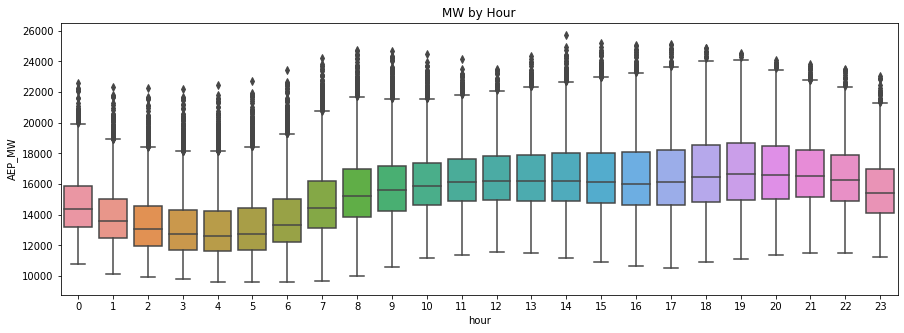

In [100]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='hour',y="AEP_MW")
ax.set_title("MW by Hour")
plt.show()

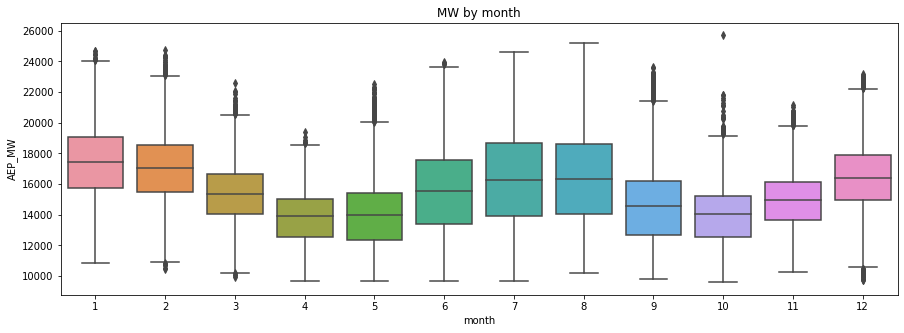

In [101]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='month',y="AEP_MW")
ax.set_title("MW by month")
plt.show()

In [56]:
train = features_generation(x_train)
test = features_generation(x_test)

In [62]:
x_train = train.drop(['AEP_MW'],axis=1)
y_train = train['AEP_MW']

x_test = test.drop(['AEP_MW'],axis=1)
y_test = test['AEP_MW']

In [60]:
x_train

,hour,dayofweek,month,year,dayofyear
Datetime,,,,,
2004-12-31 03:00:00,3,4,12,2004,366
2004-12-31 04:00:00,4,4,12,2004,366
2004-12-31 05:00:00,5,4,12,2004,366
2004-12-31 06:00:00,6,4,12,2004,366
2004-12-31 07:00:00,7,4,12,2004,366
...,...,...,...,...,...
2015-01-01 20:00:00,20,3,1,2015,1
2015-01-01 21:00:00,21,3,1,2015,1
2015-01-01 22:00:00,22,3,1,2015,1


In [61]:
y_train

Datetime
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
2004-12-31 06:00:00    13038.0
2004-12-31 07:00:00    13692.0
                        ...   
2015-01-01 20:00:00    16586.0
2015-01-01 21:00:00    16312.0
2015-01-01 22:00:00    15859.0
2015-01-01 23:00:00    15195.0
2015-01-02 00:00:00    14722.0
Name: AEP_MW, Length: 98591, dtype: float64

In [85]:
xgb_model = xgb.XGBRegressor(n_estimators = 700,early_stopping_rounds=50)
xgb_model.fit(x_train,y_train,eval_set = [(x_train,y_train),(x_test,y_test)],verbose=50) 

[0]	validation_0-rmse:11172.40933	validation_1-rmse:10318.34707
[50]	validation_0-rmse:887.29283	validation_1-rmse:1887.61776
[58]	validation_0-rmse:846.04655	validation_1-rmse:1925.19317


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [86]:
xgb_model.feature_importances_

array([0.4140699 , 0.15984459, 0.15546648, 0.0808454 , 0.18977362],
      dtype=float32)

In [90]:
df.head()

,AEP_MW,hour,dayofweek,month,year,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,12,2004,366


In [107]:
def features_generation_new(df):
    df = df.copy()
    df['hour'] = df.index.hour 
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    return df

In [108]:
train_new = features_generation_new(df)
test_new = features_generation_new(x_test)

In [109]:
x_train = train_new.drop(['AEP_MW'],axis=1)
y_train = train_new['AEP_MW']

x_test = test_new.drop(['AEP_MW'],axis=1)
y_test = test_new['AEP_MW']

In [110]:
x_train

,hour,dayofweek,dayofyear
Datetime,,,
2004-12-31 01:00:00,1,4,366
2004-12-31 02:00:00,2,4,366
2004-12-31 03:00:00,3,4,366
2004-12-31 04:00:00,4,4,366
2004-12-31 05:00:00,5,4,366
...,...,...,...
2018-01-01 20:00:00,20,0,1
2018-01-01 21:00:00,21,0,1
2018-01-01 22:00:00,22,0,1


In [111]:
y_train

Datetime
2004-12-31 01:00:00    13478.0
2004-12-31 02:00:00    12865.0
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
                        ...   
2018-01-01 20:00:00    21089.0
2018-01-01 21:00:00    20999.0
2018-01-01 22:00:00    20820.0
2018-01-01 23:00:00    20415.0
2018-01-02 00:00:00    19993.0
Name: AEP_MW, Length: 121273, dtype: float64

In [117]:
xgb_model = xgb.XGBRegressor(n_estimators = 100,early_stopping_rounds=50)
xgb_model.fit(x_train,y_train,eval_set = [(x_train,y_train),(x_test,y_test)],verbose=50) 

[0]	validation_0-rmse:11063.71997	validation_1-rmse:10327.88746
[50]	validation_0-rmse:1321.50550	validation_1-rmse:1487.11867
[58]	validation_0-rmse:1306.35394	validation_1-rmse:1476.94506


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [120]:
x_test_predict = xgb_model.predict(x_test)
test['prediction'] = x_test_predict

In [121]:
test

,AEP_MW,hour,dayofweek,month,year,dayofyear,prediction
Datetime,,,,,,,
2016-01-01 00:00:00,13487.0,0,4,1,2016,1,14952.957031
2016-12-31 01:00:00,14877.0,1,5,12,2016,366,13845.832031
2016-12-31 02:00:00,14588.0,2,5,12,2016,366,13738.008789
2016-12-31 03:00:00,14514.0,3,5,12,2016,366,13654.708008
2016-12-31 04:00:00,14591.0,4,5,12,2016,366,13654.708008
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,2018,1,17625.234375
2018-01-01 21:00:00,20999.0,21,0,1,2018,1,17625.234375
2018-01-01 22:00:00,20820.0,22,0,1,2018,1,17301.552734


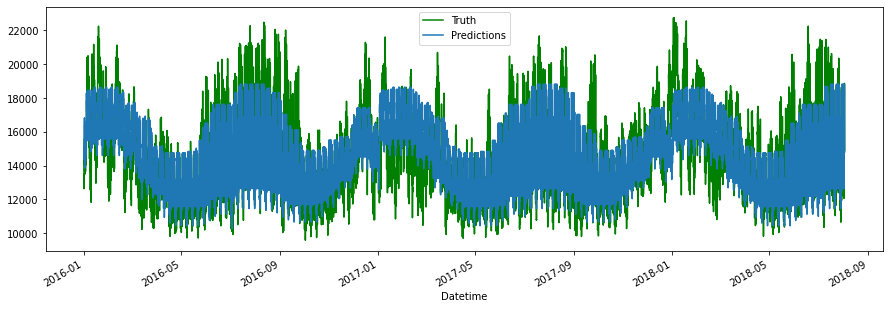

In [125]:
fig,ax = plt.subplots(figsize=(15,5))
test['AEP_MW'].plot(ax=ax,color='g')
test['prediction'].plot(ax=ax)
plt.legend(['Truth','Predictions'])
plt.show()